In [ ]:
import os
import sys
sys.path.append("XXX")
import torch
from helper import (
    Affine,
    get_data
)
import matplotlib.pyplot as plt

DIR_PATH = %pwd
pjoin = os.path.join

In [ ]:
x, y, rot, trans = get_data(pjoin(DIR_PATH, "tmp/coord.csv"))
x = torch.tensor(x).float()
y = torch.tensor(y).float()
affin = Affine()
mse = torch.nn.MSELoss()
optim = torch.optim.SGD(params=list(affin.parameters()), lr=.005)
for i in range(5000):
    x_ = affin(y)
    loss = mse(x_, x)
    optim.zero_grad()
    loss.backward()
    optim.step()
    print(i, loss.item())

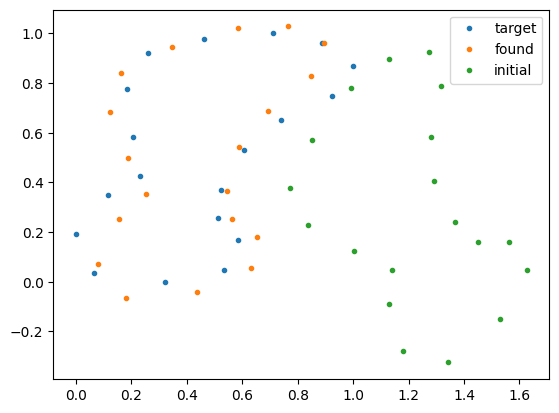

In [5]:
x_ = affin(y).detach().numpy()
x = x.detach().numpy()
plt.plot(x[:, 0], x[:, 1], '.', label='target')
plt.plot(x_[:, 0], x_[:, 1], '.',label='found')
plt.plot(y[:, 0], y[:, 1], '.', label='initial')
plt.legend()

# TODO: add comparisons with other optimizers